# LDA Topic Modeling


## US Presidential Inaugural Speeches

#### Sources:

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://medium.com/the-die-is-forecast/topic-modeling-as-osint-exploring-russian-presidential-speech-topics-over-time-ad6018286d37

https://towardsdatascience.com/tf-idf-a-visual-explainer-and-python-implementation-on-presidential-inauguration-speeches-2a7671168550

https://medium.com/@med.taha.elahmar/an-nlp-case-study-with-us-presidents-inaugural-speeches-part-1-2-data-collection-and-f1e2c5df5e50

https://medium.com/@med.taha.elahmar/an-nlp-case-study-with-us-presidents-inaugural-speeches-part-2-2-model-generation-and-evaluation-be235bbf82c3

https://www.kaggle.com/code/pabheeshta/us-presidential-inaugural-speeches#Text-Cleaning

https://www.theanalyticslab.nl/topic-modeling-with-latent-dirichlet-allocation-lda/



In [1]:
!pip install wordcloud pandas seaborn matplotlib bs4 nltk lxml gensim pyLDAvis scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import re
import string
import itertools
import collections
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import nltk



C:\Users\gokha\AppData\Local\Temp\ipykernel_78308\740436692.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
speech_DF = pd.read_csv('inaug_speeches.csv', encoding= 'latin1')

In [4]:
speech_DF = speech_DF.drop(columns = 'Unnamed: 0')

In [5]:
speech_DF.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again cal...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CA...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to ..."


In [6]:
#Text cleaning

for s in speech_DF['text']:
     s = str(s)

In [7]:
def remove_u(s):
    no_u = re.sub(r'<.*?>', ' ', s)
    return no_u

speech_DF['text'] = speech_DF['text'].apply(lambda x: remove_u(x))

In [8]:
def remove_punc(s):
    no_punc = "".join([i for i in s if i not in string.punctuation])
    return no_punc

speech_DF['text'] = speech_DF['text'].apply(lambda x: remove_punc(x))

In [9]:
def remove_space(s):
    soup = BeautifulSoup(s, 'html.parser')
    no_space = soup.get_text(strip = True)
    no_space = no_space.replace(u'\xa0', u'')
    return no_space

speech_DF['text'] = speech_DF['text'].apply(lambda x: remove_space(x))

In [10]:
tokenizer = RegexpTokenizer(r'\w+')
speech_DF['text'] = speech_DF['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [11]:
def remove_stop_words(s):
    no_stop = [i for i in s if i not in stopwords.words('english')]
    return no_stop

speech_DF['text'] = speech_DF['text'].apply(lambda x: remove_stop_words(x))

In [12]:
def joining(s):
    joined_words = " ".join([i for i in s])
    return joined_words

speech_DF['text'] = speech_DF['text'].apply(lambda x: joining(x))

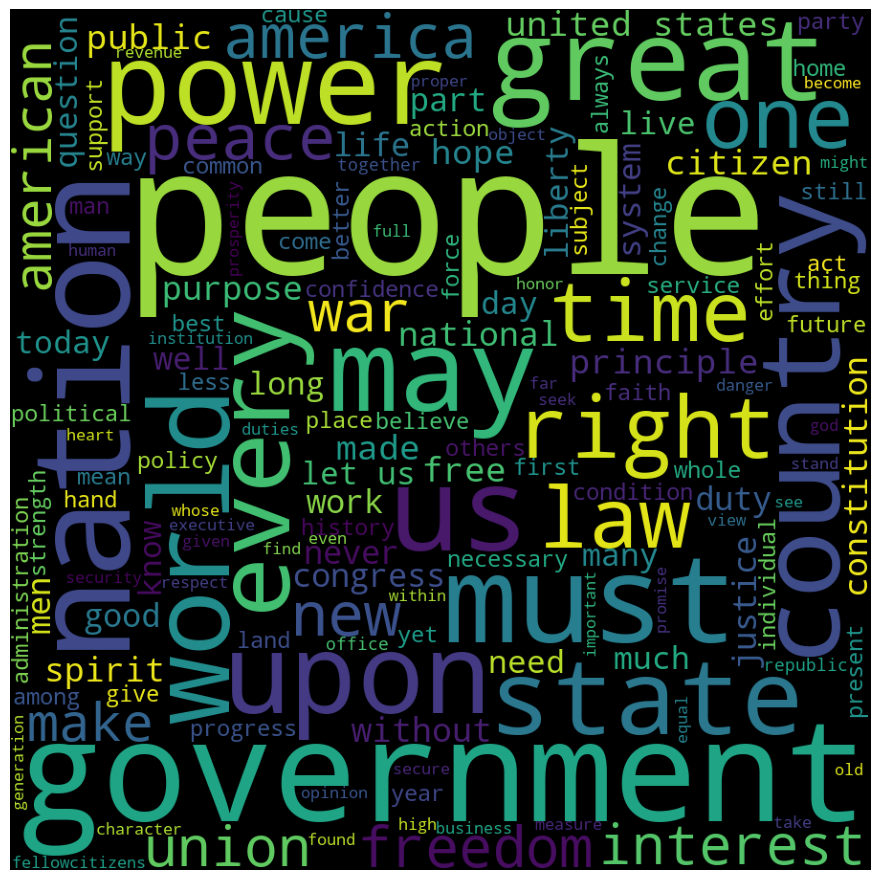

In [13]:
speeches = pd.Series(speech_DF['text'].tolist()).astype(str)
plt.figure(figsize = (9, 9))
wcloud_all = WordCloud(width = 900, height = 900, max_words = 150).generate(''.join(speeches))
plt.imshow(wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [14]:
speech_DF_token = speech_DF.copy()

In [15]:
speech_DF_token['text'] = speech_DF_token['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [16]:
speech_DF_token.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789","[fellowcitizens, senate, house, representative..."
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793","[fellow, citizens, called, upon, voice, countr..."
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","[first, perceived, early, times, middle, cours..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801","[friends, fellowcitizens, called, upon, undert..."
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","[proceeding, fellowcitizens, qualification, co..."


In [17]:
speech_list = list(itertools.chain.from_iterable(speech_DF_token['text']))

In [18]:
word_freq = collections.Counter(speech_list)

In [19]:
word_freq_DF = pd.DataFrame(word_freq.most_common(15), columns=['Words', 'Count'])

word_freq_DF.head(15)

,Words,Count
0,people,576
1,government,566
2,us,480
3,upon,373
4,must,366
5,great,340
6,may,338
7,states,335
8,world,317
9,shall,314


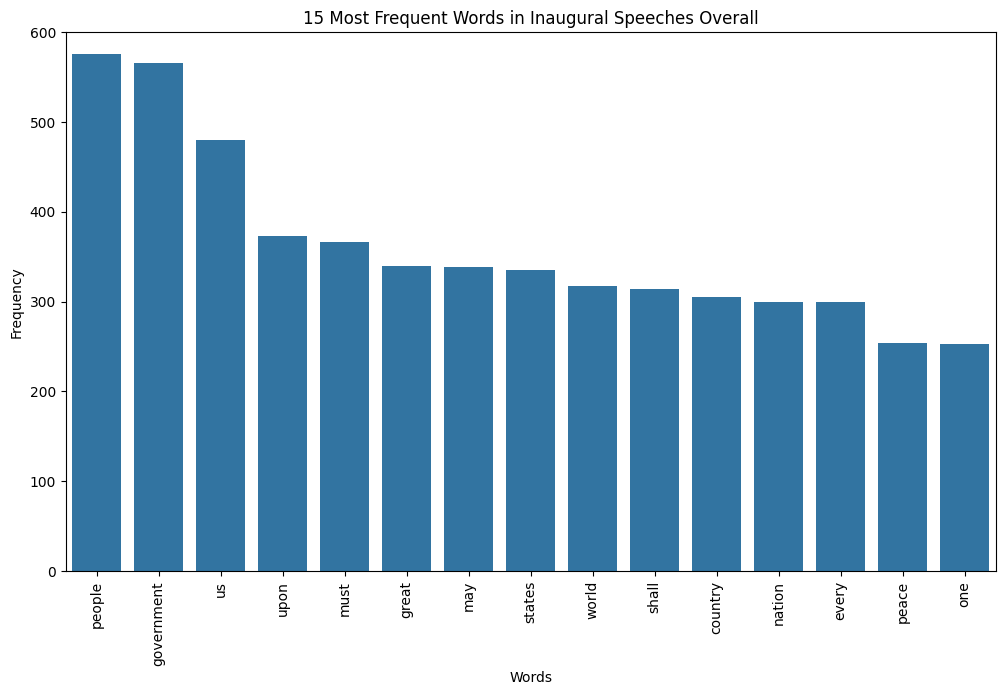

In [20]:
plt.figure(figsize = (12, 7))
sns.barplot(data = word_freq_DF, x = "Words", y = "Count")
plt.ylabel("Frequency")
plt.ylim(0,600)
plt.xticks(rotation = 90)
plt.title("15 Most Frequent Words in Inaugural Speeches Overall")
plt.show()

In [21]:
data=speech_DF

In [22]:
# Latent Dirichlet Allocation (LDA) analysis of text columns
lda_copy = data.copy(deep=True)
lda_copy.head()
# Removing punctiation and lower-casing text field without changing original dataframe.
import re
lda_copy=data["text"]
lda_copy = lda_copy.map(lambda x: re.sub('[,.!?]|<br \/>\+|<br \/>', '', x))
lda_copy = lda_copy.map(lambda x: x.lower())
lda_copy.head()
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [23]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(lda_copy)

In [24]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words -
                                                  1:-1]]))
# Tweak the two parameters below
number_topics = 8
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
people world nation new america time government freedom peace let

Topic #1:
people states government shall public constitution great nation laws power

Topic #2:
great people government country nation life justice world peace party

Topic #3:
government business federal proper law shall race congress policy states

Topic #4:
proportion delicate inculcate upbraidings arrive willingly previous legions unsolicited dawning

Topic #5:
agitate heed jungle lawless injunctions previous ceremony witnesses violated incurring

Topic #6:
world people new america nation nations peace freedom government american

Topic #7:
government people states country shall constitution public union great united


In [25]:
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [26]:
data.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellowcitizens senate house representatives am...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens called upon voice country exec...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797",first perceived early times middle course amer...
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",friends fellowcitizens called upon undertake d...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805",proceeding fellowcitizens qualification consti...


In [27]:
#create dictionary
dictionary = corpora.Dictionary(speech_DF_token['text'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

39267


In [28]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in speech_DF_token['text'] ]
print(len(doc_term_matrix))

58


In [29]:
lda = gensim.models.ldamodel.LdaModel

In [30]:

num_topics=3
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: total: 8.58 s
Wall time: 8.57 s


In [31]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.009*"people" + 0.009*"government" + 0.008*"us" + 0.006*"upon" + 0.006*"must" + 0.005*"shall" + 0.005*"states" + 0.005*"great" + 0.005*"world" + 0.005*"may"'),
 (1,
  '0.007*"freedom" + 0.007*"world" + 0.005*"free" + 0.005*"us" + 0.005*"must" + 0.005*"america" + 0.004*"nations" + 0.004*"peace" + 0.004*"know" + 0.004*"nation"'),
 (2,
  '0.008*"government" + 0.006*"states" + 0.006*"great" + 0.005*"may" + 0.005*"people" + 0.005*"public" + 0.005*"every" + 0.005*"union" + 0.005*"country" + 0.004*"united"')]

In [32]:
#dictionary
id2word = corpora.Dictionary(speech_DF_token['text'])
#corpus
texts = speech_DF_token['text']
#term document matrix
corpus = [id2word.doc2bow(text) for text in speech_DF_token['text']]

In [33]:
lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = 8,
                                       random_state = 42,
                                       chunksize = 100,
                                       passes = 10,
                                       per_word_topics=True,
                                       minimum_probability = 0)

In [34]:
lda_model.print_topics()

[(0,
  '0.010*"government" + 0.007*"states" + 0.007*"may" + 0.007*"people" + 0.007*"country" + 0.007*"great" + 0.006*"public" + 0.006*"upon" + 0.005*"shall" + 0.005*"every"'),
 (1,
  '0.009*"us" + 0.008*"people" + 0.007*"must" + 0.006*"world" + 0.006*"nation" + 0.006*"america" + 0.005*"government" + 0.005*"every" + 0.005*"new" + 0.005*"nations"'),
 (2,
  '0.008*"government" + 0.008*"upon" + 0.007*"people" + 0.007*"every" + 0.005*"shall" + 0.005*"us" + 0.005*"great" + 0.004*"may" + 0.004*"power" + 0.004*"country"'),
 (3,
  '0.009*"people" + 0.008*"government" + 0.007*"states" + 0.007*"may" + 0.007*"shall" + 0.006*"upon" + 0.006*"constitution" + 0.005*"war" + 0.005*"must" + 0.004*"great"'),
 (4,
  '0.007*"upon" + 0.005*"shall" + 0.004*"purpose" + 0.004*"action" + 0.003*"stand" + 0.003*"us" + 0.003*"life" + 0.003*"counsel" + 0.003*"thought" + 0.003*"principles"'),
 (5,
  '0.012*"us" + 0.009*"world" + 0.009*"people" + 0.008*"must" + 0.007*"government" + 0.007*"new" + 0.007*"nation" + 0.006

In [35]:
pyLDAvis.enable_notebook()

In [36]:
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,n_jobs=1)


In [37]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.076000  0.099470       1        1  31.418553
0     -0.101015 -0.083801       2        1  29.285952
3     -0.069164 -0.043208       3        1  18.599310
1     -0.046243  0.097331       4        1   9.596361
2     -0.038919 -0.048173       5        1   8.376282
7      0.084707 -0.036439       6        1   1.537915
4      0.093950  0.007560       7        1   0.826610
6      0.152684  0.007260       8        1   0.359017, topic_info=            Term        Freq       Total Category  logprob  loglift
536         upon  334.000000  334.000000  Default  30.0000  30.0000
342       people  517.000000  517.000000  Default  29.0000  29.0000
487           us  432.000000  432.000000  Default  28.0000  28.0000
427        shall  283.000000  283.000000  Default  27.0000  27.0000
215   government  518.000000  518.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
487           us    0.344398  432.889793   Topic8  -6.5061  -1.5069
415       safely    0.222744    7.973448   Topic8  -6.9418   2.0517
6657     savings    0.211536    5.322773   Topic8  -6.9935   2.4042
1899    increase    0.232137   36.598360   Topic8  -6.9005   0.5691
342       people    0.233437  517.734183   Topic8  -6.8950  -2.0747

[649 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
541       2  0.895400  aboriginal
1439      1  0.253057      action
1439      2  0.371150      action
1439      3  0.067482      action
1439      4  0.118093      action
...     ...       ...         ...
506       5  0.051290       would
506       6  0.005129       would
1070      2  0.895283        zeal
1070      5  0.081389        zeal
2552      2  0.894973     zealous

[1312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 2, 3, 8, 5, 7])

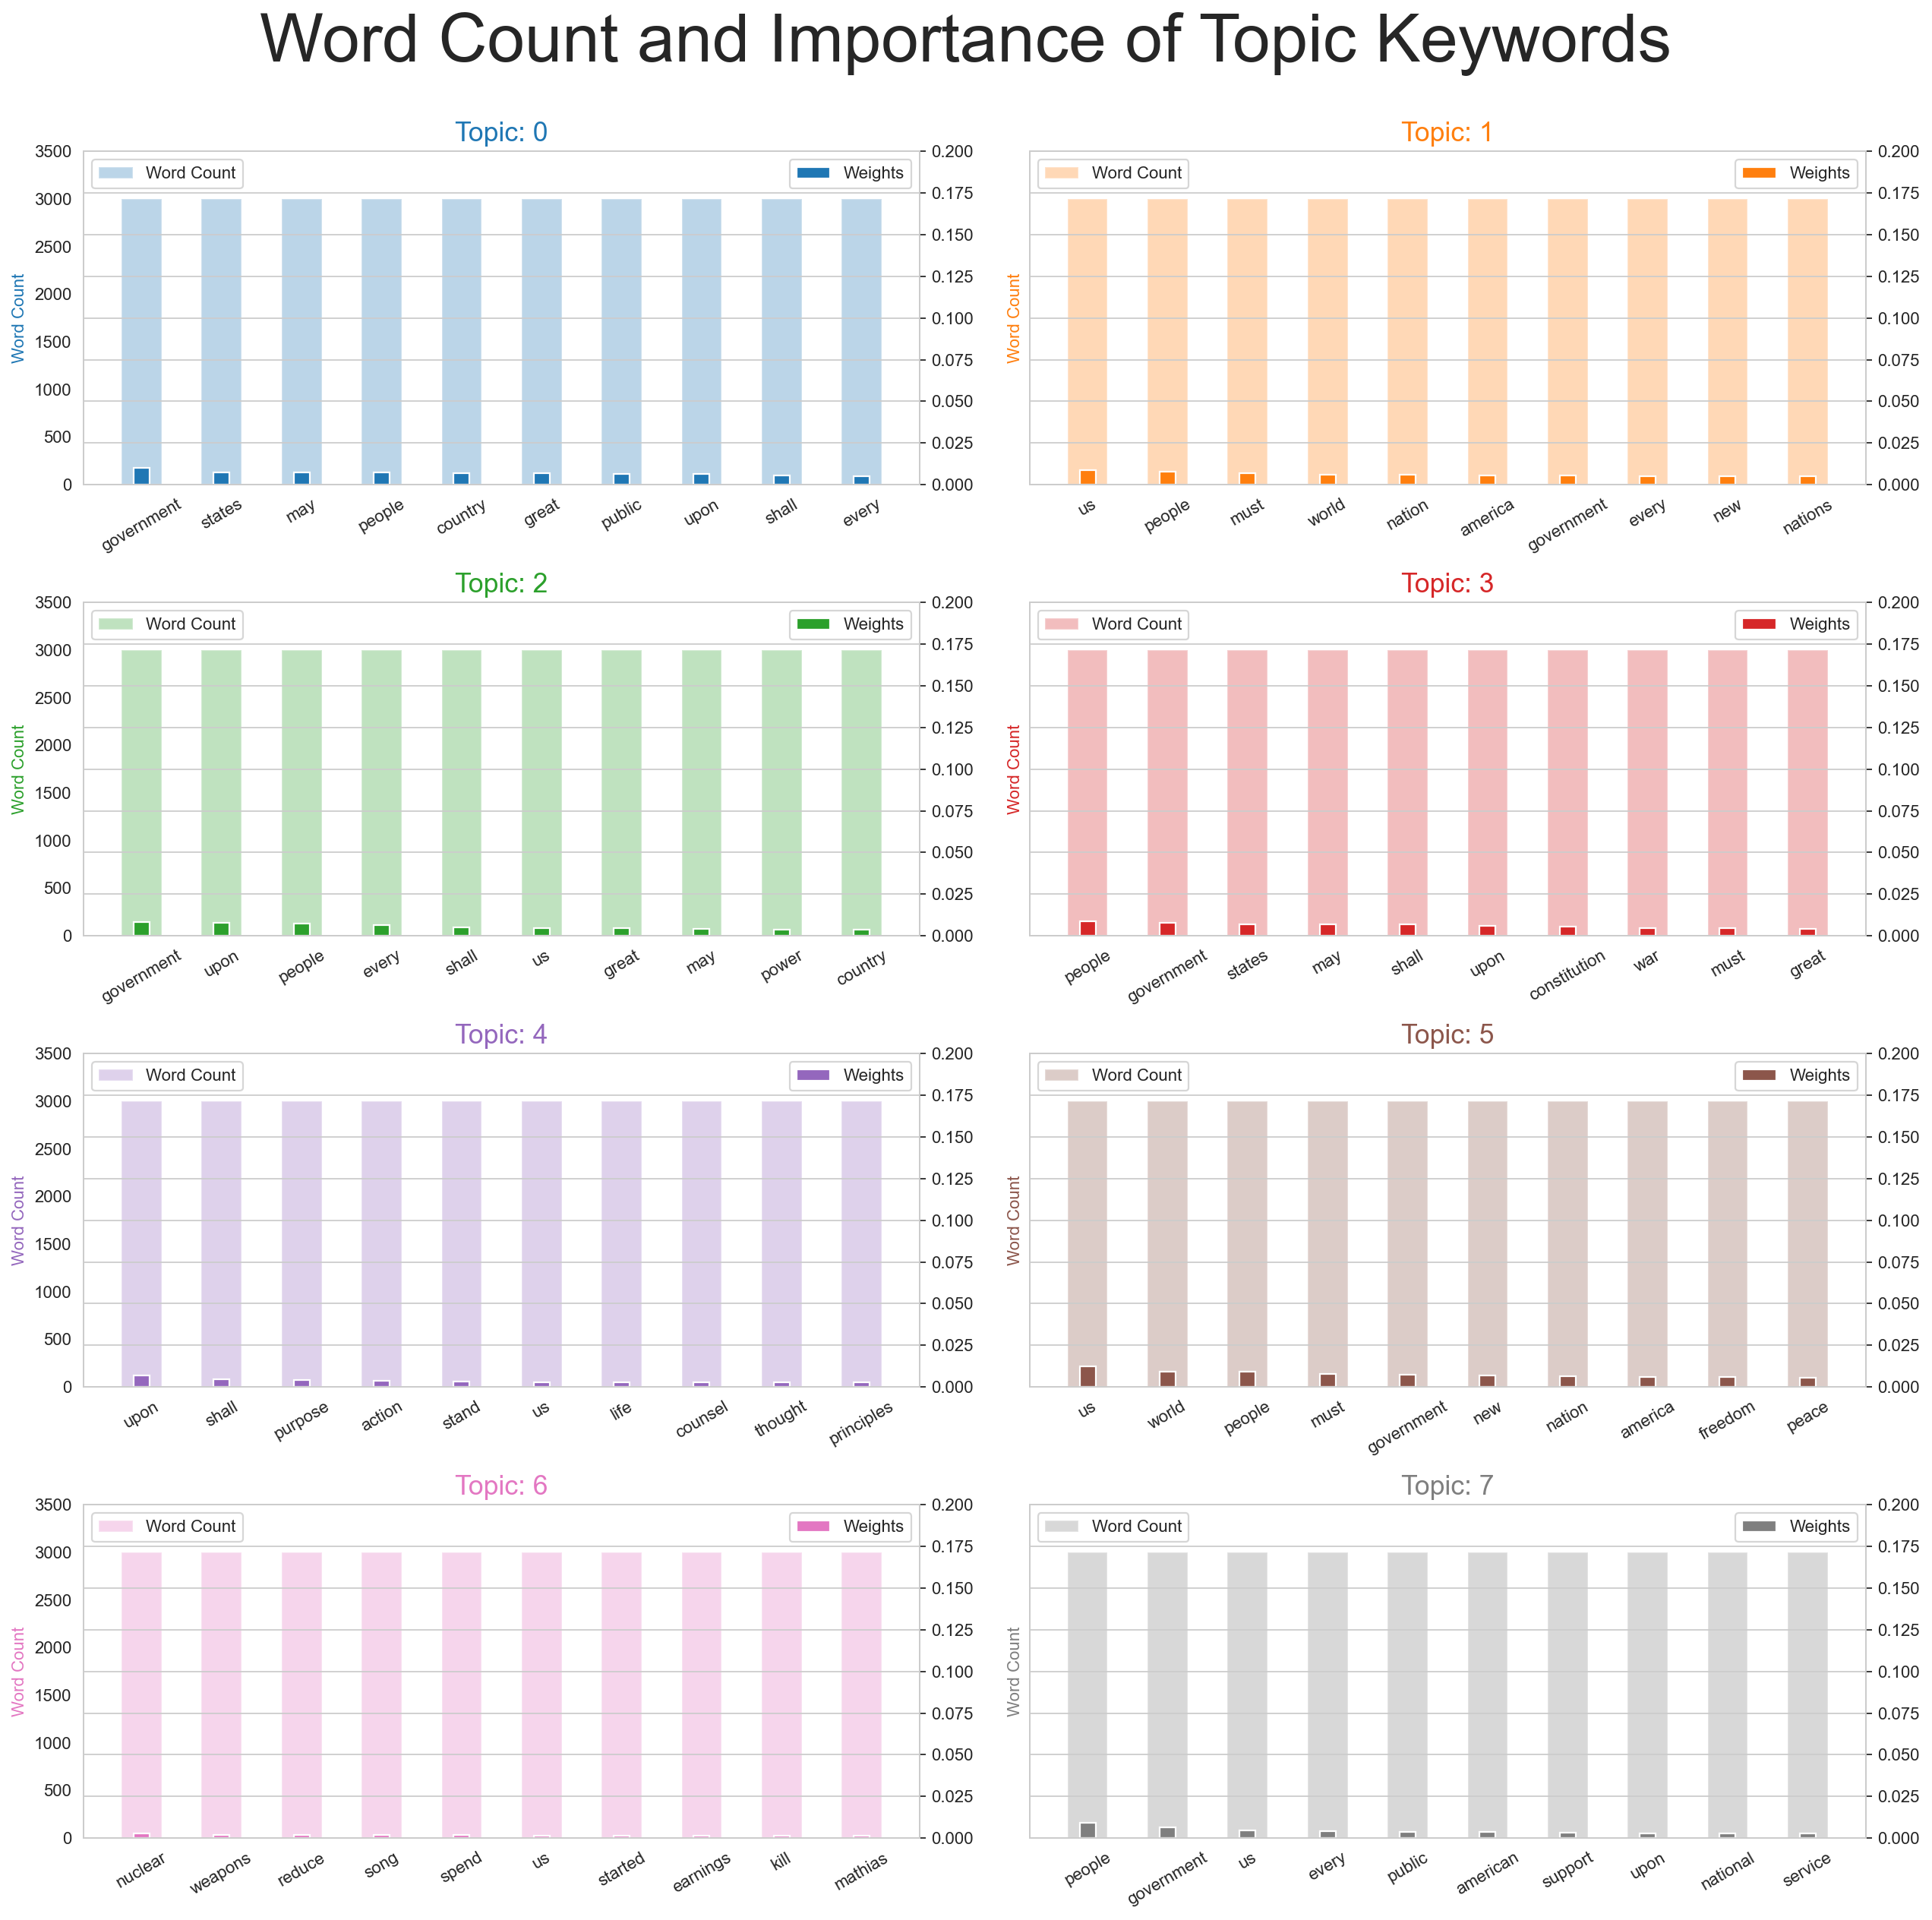

In [39]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
%matplotlib inline
topics = lda_model.show_topics(formatted=False, num_topics =8)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(16,15), sharey=True, dpi=160) #setting the number of topics visualised 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height=3000, data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.2); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'center')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
    ax.grid(False)

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=40, y=1.05)    
plt.show

from matplotlib import pyplot as plt

#plt.savefig('foo.png')
#plt.savefig('foo.pdf')
